## DP Problem Set 3

### Question 1

#### Occupations

In [44]:
#step1
import numpy as np #standard convention for numpy

In [45]:
import pandas as pd #standard convention for pandas

In [30]:
#step2
#step3
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [37]:
#step4
users_age = users[['occupation','age']]
users_age.head()
users_age.groupby(['occupation']).mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [47]:
#step5
Male=users.groupby(['occupation','gender']).gender.count()
Males=users.groupby('occupation').gender.count()
ratio_males=(a/b)*100
ratio_males.sort_values(ascending=False).xs('M',level=1)

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

In [54]:
#step6
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [55]:
#step7
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [56]:
#step8
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

In [57]:
occup_count = users.groupby(['occupation']).count()

In [58]:
occup_gender = gender_ocup.div(occup_count, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

### Question 2

#### Euro teams

In [1]:
#step1
import pandas as pd
import numpy as np

In [2]:
#step2&3
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [3]:
#step4
euro12_Goals = euro12["Goals"]
euro12_Goals.head()


0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [5]:
#step5
euro12["Team"].nunique()


16

In [6]:

#step6
len(euro12.columns)

35

In [7]:
#step7
discipline=euro12[["Team","Yellow Cards","Red Cards"]]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [8]:
#step8
discipline.sort_values(by=["Red Cards","Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [9]:
#step9
mean_Yellow_Card = discipline[["Team","Yellow Cards"]]
mean_Yellow_Card.groupby("Team").mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [10]:
#step10
euro12[["Goals","Team"]].loc[(euro12["Goals"]>6)]

,Goals,Team
5,10,Germany
13,12,Spain


In [11]:
#step11
euro12["Team"].loc[euro12["Team"].str.startswith("G",na=False)]

5    Germany
6     Greece
Name: Team, dtype: object

In [12]:
#step12
euro12.iloc[:,0:5]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy
0,Croatia,4,13,12,51.9%
1,Czech Republic,4,13,18,41.9%
2,Denmark,4,10,10,50.0%
3,England,5,11,18,50.0%
4,France,3,22,24,37.9%
5,Germany,10,32,32,47.8%
6,Greece,5,8,18,30.7%
7,Italy,6,34,45,43.0%
8,Netherlands,2,12,36,25.0%
9,Poland,2,15,23,39.4%


In [13]:
#step13
euro12.tail(-3)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
11,Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,...,17,65.4%,43,51,11,6,1,10,10,17
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16


In [14]:
#step14
euro12_filter = euro12[["Team","Shooting Accuracy"]].set_index(["Team"])
euro12_filter.head()
euro12_filter.loc[["England","Italy","Russia"]]

,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%
Russia,22.5%


### Question 3

#### Housing

In [59]:
A = pd.Series(np.random.randint(1,5,100))
B = pd.Series(np.random.randint(1,4,100))
C = pd.Series(np.random.randint(10000,30000,100))

In [60]:
SC = pd.concat([A,B,C],axis=1)
SC.head()

,0,1,2
0,3,3,21521
1,2,3,29668
2,4,3,28642
3,4,2,23579
4,3,1,14111


In [61]:
SC.columns = ['bedrs','bathrs','price_sqr_meter']
SC.head()

,bedrs,bathrs,price_sqr_meter
0,3,3,21521
1,2,3,29668
2,4,3,28642
3,4,2,23579
4,3,1,14111


In [62]:
bigcolumn = pd.concat([A,B,C],axis=0)

In [63]:
bigcolumn

0         3
1         2
2         4
3         4
4         3
      ...  
95    11114
96    25449
97    18118
98    23685
99    16537
Length: 300, dtype: int32

In [64]:
len(bigcolumn)

300

In [65]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          3
1          2
2          4
3          4
4          3
       ...  
295    11114
296    25449
297    18118
298    23685
299    16537
Length: 300, dtype: int32

### Question 4

#### Wind Statistics

In [1]:
#Step1
import pandas as pd
import numpy as np
import datetime as dt

#Step2 & 3
data = pd.read_csv(r"C:\Users\Eshita Gupta\Downloads\wind.txt", delim_whitespace=True)

data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
print(data)


        RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL    CLO  \
0     15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83  12.58   
1     14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   9.67   
2     18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   7.67   
3     10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   5.88   
4     13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92  10.34   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04  14.00   
6570  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25  18.05   
6571  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50  16.42   
6572  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46  12.12   
6573  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58  11.38   

        BEL    MAL       Date  
0     18.50  15.04 2061-01-01  

In [2]:
ndata = data.set_index("Date")
print(ndata.index.astype("datetime64[ns]"))

DatetimeIndex(['2061-01-01', '2061-01-02', '2061-01-03', '2061-01-04',
               '2061-01-05', '2061-01-06', '2061-01-07', '2061-01-08',
               '2061-01-09', '2061-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)


In [3]:
m=ndata.isnull().values.ravel().sum()
print(m)

31


In [4]:
nmv=ndata.count().sum()
print(nmv)

78857


In [5]:
mws = ndata.mean()
print(mws.mean())

10.227982360836924


In [6]:
def statistics(x):
    x = pd.Series(x)
    minimum = x.min()
    maximum = x.max()
    mean = x.mean()
    sd = x.std()
    result = [minimum,maximum,mean,sd]
    index = ["Min","Max","Mean","Std"]
    result = pd.Series(result,index=index)
    return result
ls = ndata.apply(statistics)
print(ls)

            RPT        VAL        ROS        KIL        SHA        BIR  \
Min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
Max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
Mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
Std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
Min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
Max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
Mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
Std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


In [7]:
ds = ndata.apply(statistics,axis=1)
print(ds)

             Min    Max       Mean       Std
Date                                        
2061-01-01  9.29  18.50  13.018182  2.808875
2061-01-02  6.50  17.54  11.336364  3.188994
2061-01-03  6.17  18.50  11.641818  3.681912
2061-01-04  1.79  11.75   6.619167  3.198126
2061-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [8]:
avg_Jan = ndata[ndata.index.month == 1].mean()
print(avg_Jan)

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [9]:
y=ndata.resample('A').mean()
print(y)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1972-12-31  12.463962  10.561311  12.058333  5.929699   9.430410  6.358825   
1973-12-31  11.828466  10.680493  10.680493  5.547863   9.640877  6.548740   
1974-12-31  13.643096  11.811781  12.336356  6.427041  11.110986  6.809781   
1975-12-31  12.008575  10.293836  11.564712  5.269096   9.190082  5.668521   
1976-12-31  11.737842  10.203115  10.761230  5.109426   8.846339  6.311038   
...               ...        ...        ...       ...        ...       ...   
2067-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
2068-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
2069-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
2070-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
2071-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [10]:
m=ndata.resample('M').mean()
print(m)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1972-01-31  14.383871  11.848387  13.732258  5.925161  10.823226  7.291290   
1972-02-29  14.046207  10.814483  12.960000  6.347586  10.918621  7.245172   
1972-03-31  12.900000  10.505161  13.220323  6.949032  10.996452  6.949677   
1972-04-30  13.675333  10.638000  13.237667  7.232667  11.253667  7.036333   
1972-05-31  15.963226  12.636129  14.579355  7.974839  13.021290  7.560968   
...               ...        ...        ...       ...        ...       ...   
2071-08-31   9.783226   6.991935  10.227097  4.540968   8.978065  4.797742   
2071-09-30   8.365000   6.512667   7.704333  3.470667   7.676667  5.462667   
2071-10-31  12.926129  11.106452  12.467419  5.778065  11.305161  8.562903   
2071-11-30  13.334667  10.853667  12.223333  6.250667  10.895000  7.660000   
2071-12-31  13.162581  10.606774  13.367097  6.070000  10.393871

In [11]:
w=ndata.resample('W').mean()
print(w)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1972-01-02   9.125000   2.545000  13.270000   4.375000   4.980000   2.625000   
1972-01-09  11.792857   7.761429  11.124286   4.212857   7.742857   5.500000   
1972-01-16  17.061429  14.494286  16.241429   7.025714  12.231429   8.808571   
1972-01-23  13.291429  13.375714  10.905714   5.304286  11.874286   8.457143   
1972-01-30  15.732857  12.928571  16.025714   7.304286  11.665714   6.702857   
...               ...        ...        ...        ...        ...        ...   
2071-12-06   9.432857   8.880000   7.755714   2.404286   7.097143   4.291429   
2071-12-13   9.471429   6.048571   8.330000   3.791429   7.065714   5.614286   
2071-12-20  21.120000  18.934286  17.741429  10.798571  16.771429  13.542857   
2071-12-27  12.938571  10.191429  12.685714   5.910000  10.054286   8.178571   
2072-01-03  13.397500   9.127500  24.280

In [12]:
fy = ndata[ndata.index.year == 1961]
stats = ndata.resample('W').mean().apply(lambda x: x.describe())
print(stats)

              RPT         VAL         ROS         KIL         SHA         BIR  \
count  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000   
mean    12.362833   10.640641   11.668382    6.308357   10.454024    7.090037   
std      3.454099    3.378790    2.862755    2.197214    3.158016    2.559691   
min      3.928571    2.452857    4.687143    1.464286    2.775714    1.310000   
25%      9.917143    8.362857    9.632857    4.708571    8.298571    5.194286   
50%     12.250000   10.441429   11.535714    6.097143   10.358571    6.960000   
75%     14.648571   12.820000   13.415714    7.558571   12.530000    8.774286   
max     22.647143   23.304286   24.280000   13.930000   22.480000   15.408571   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  
mean     9.801759    8.492537    8.495299    8.706078   13.116573   15.595794  
std      3.331341    2.861440 

### Question 5

#### Chipo

In [14]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [72]:
len(chipo)

4622

In [73]:
len(chipo.columns)

5

In [76]:
print(chipo.columns)
chipo.head(0)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


,order_id,quantity,item_name,choice_description,item_price


In [78]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [39]:
o=chipo[["item_name","order_id"]].groupby('item_name').count().sort_values(by="order_id",ascending=False)
o.head(1)

,order_id
item_name,
Chicken Bowl,726


In [40]:
oc=chipo[["item_name","order_id","choice_description"]].groupby('item_name').count().sort_values(by="order_id",ascending=False)
oc.head(1)

,order_id,choice_description
item_name,,
Chicken Bowl,726,726


In [20]:
chipo['quantity'].sum()

4972

In [68]:
chipo['item_price'] = pd.to_numeric(chipo['item_price'], errors = 'coerce')
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB
None


In [55]:
print(chipo['item_price'].dtype)

float64


In [66]:
chipo['item_price'].apply(lambda x: object if isinstance(x, float) else x)

0       <class 'object'>
1       <class 'object'>
2       <class 'object'>
3       <class 'object'>
4       <class 'object'>
              ...       
4617    <class 'object'>
4618    <class 'object'>
4619    <class 'object'>
4620    <class 'object'>
4621    <class 'object'>
Name: item_price, Length: 4622, dtype: object

In [64]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB
None


In [15]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '')
pd.to_numeric(chipo['item_price'])

C:\Users\ESHITA~1\AppData\Local\Temp/ipykernel_27404/347208318.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$', '')


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [19]:
price_num = pd.to_numeric(chipo['item_price']).sum()
price_num

34500.16

In [17]:
orders = chipo['order_id'].nunique()
orders

1834

### Question 6

#### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
usa= pd.read_csv(r"C:\Users\Eshita Gupta\Downloads\us-marriages-divorces-1867-2014.csv",sep=",")
usa.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


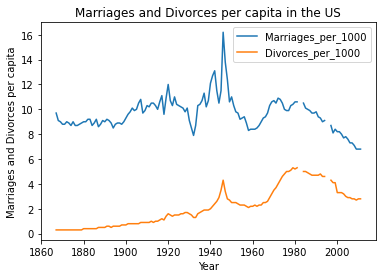

In [19]:
x_axis = usa[["Year"]]

fig, ax = plt.subplots()
ax.plot(x_axis,usa[["Marriages_per_1000"]])
ax.plot(x_axis,usa[["Divorces_per_1000"]])
ax.set_title('Marriages and Divorces per capita in the US')
ax.set_xlabel('Year')
ax.set_ylabel('Marriages and Divorces per capita')
ax.legend(usa[["Marriages_per_1000","Divorces_per_1000"]])

### Question 7

#### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.


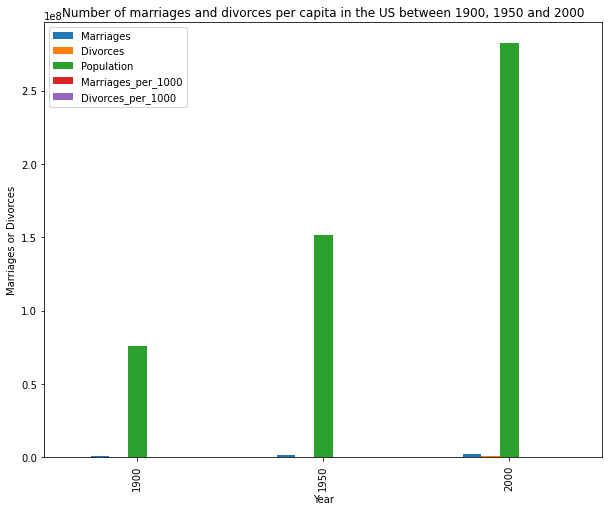

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
var =usa.loc[(usa['Year']==1900) | (usa['Year']==1950) | (usa['Year']==2000)]
barchart = var.groupby("Year").sum().plot.bar(figsize=(10,8))
barchart.set_title('Number of marriages and divorces per capita in the US between 1900, 1950 and 2000')
barchart.set_xlabel('Year')
barchart.set_ylabel('Marriages or Divorces')
barchart.legend()

### Question 8

#### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
actor = pd.read_csv(r"C:\Users\Eshita Gupta\Downloads\actor_kill_counts.csv")
actor.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


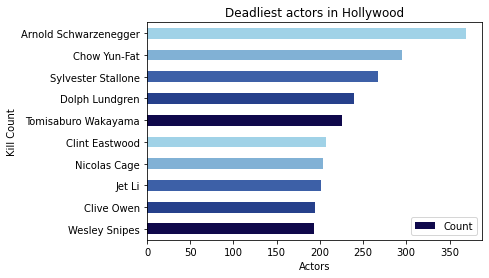

In [30]:
actor_x_axis=actor[["Actor"]]
colors=['#0F084B','#26408B','#3D60A7','#81B1D5','#A0D2E7','#0F084B','#26408B','#3D60A7','#81B1D5','#A0D2E7','#0F084B','#26408B','#3D60A7','#81B1D5','#A0D2E7','#0F084B','#26408B','#3D60A7','#81B1D5','#A0D2E7','#0F084B','#26408B','#3D60A7','#81B1D5','#A0D2E7']
bar = actor.groupby("Actor").Count.mean().sort_values().plot.barh(color=colors)
bar.set_title('Deadliest actors in Hollywood')
bar.set_xlabel('Actors')
bar.set_ylabel('Kill Count')
bar.legend()

### Question 9

#### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [32]:
roman = pd.read_csv(r"C:\Users\Eshita Gupta\Downloads\roman-emperor-reigns.csv")
roman.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


<AxesSubplot:ylabel='Emperor'>

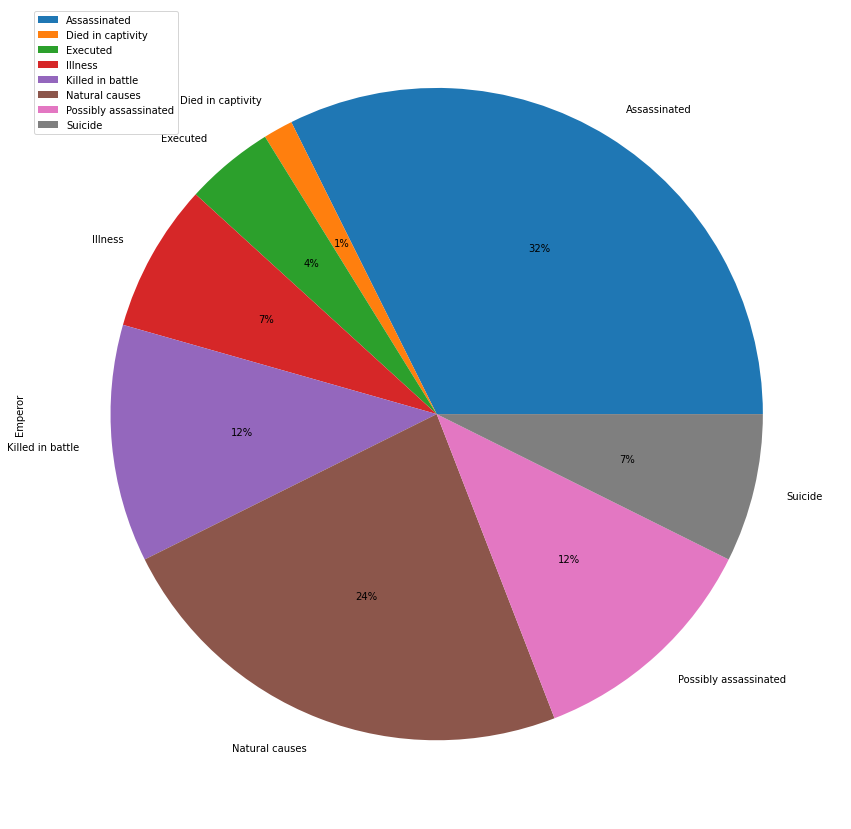

In [33]:
assassin = roman[["Emperor","Cause_of_Death"]].groupby("Cause_of_Death").count()
total = assassin[["Emperor"]].sum()
assassin.plot.pie(y="Emperor",figsize=(20,15),autopct='%1.0f%%')

### Question 10

#### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

In [35]:
import seaborn as sns
arcade = pd.read_csv(r'C:\Users\Eshita Gupta\Downloads\arcade-revenue-vs-cs-doctorates.csv')
arcade.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


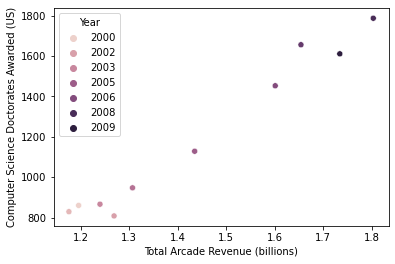

In [36]:
plot=sns.scatterplot(x="Total Arcade Revenue (billions)",y="Computer Science Doctorates Awarded (US)",hue='Year',data=arcade)